In [1]:
import math
import numpy
from matplotlib import pyplot
# помещаем рисунки в блокнот
%matplotlib inline

In [2]:
N = 50                          # Число узлов сетки в каждом направлении
x_start, x_end = -2.0, 2.0            # границы по x
y_start, y_end = -2.0, 2.0            # границы по y
x = numpy.linspace(x_start, x_end, N)    # создаем одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # создаем одномерный массив y
X, Y = numpy.meshgrid(x, y)              # создает сетку

In [3]:
Y

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.91836735, -1.91836735, -1.91836735, ..., -1.91836735,
        -1.91836735, -1.91836735],
       [-1.83673469, -1.83673469, -1.83673469, ..., -1.83673469,
        -1.83673469, -1.83673469],
       ...,
       [ 1.83673469,  1.83673469,  1.83673469, ...,  1.83673469,
         1.83673469,  1.83673469],
       [ 1.91836735,  1.91836735,  1.91836735, ...,  1.91836735,
         1.91836735,  1.91836735],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [4]:
kappa = 1.0                        # интенсивность диполя
x_doublet, y_doublet = 0.0, 0.0    # положение диполя

In [5]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    """
    u = - strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/\
    ((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/\
    ((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [6]:
# рассчитываем поле скорости в узлах расчетной сетки
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# рассчитываем функцию тока в узлах расчетной сетки
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

In [8]:
x_doublet

0.0

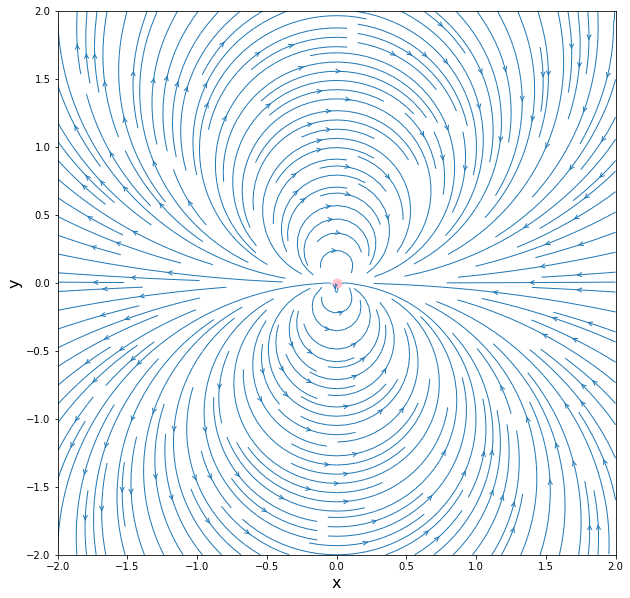

In [28]:
# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet, 
               density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color= 'pink', s=80, marker='o');

In [23]:
u_inf = 1.0        # скорость на бесконечности

# вычисляем компоненты скорости равномерного потока
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# вычисляем функцию тока
psi_freestream = u_inf * Y

In [24]:
u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet + psi_freestream

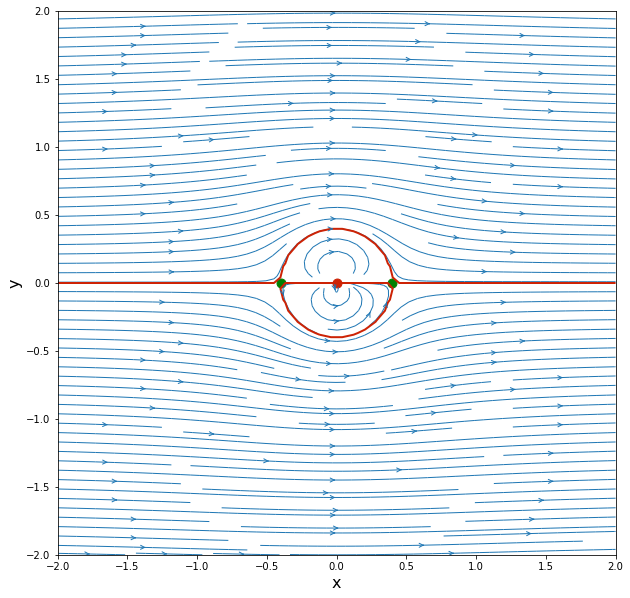

In [27]:
# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.contour(X, Y, psi, levels=[0,], colors='#CD2305', linewidths=2,\
               linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# определяем положение точек торможения
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0

# рисуем точки торможения
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='green',\
               s=80, marker='o');